In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [5]:
ds = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/COVID_19_Datasets/master/csse_covid_19_daily_reports_us.csv')
ds

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [6]:
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [7]:
ds.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [8]:
ds.shape

(58, 18)

In [9]:
ds.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [10]:
ds.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [12]:
ds.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [13]:
for col in ['Lat', 'Long_', 'Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Hospitalization_Rate','Testing_Rate']:
    ds[col].fillna(ds[col].mode()[0], inplace=True)

In [14]:
ds.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

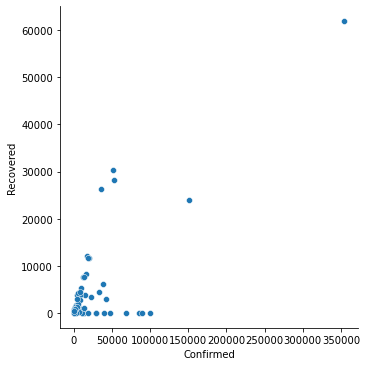

In [15]:
sns.relplot(x="Confirmed",y="Recovered",data=ds)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'American Samoa'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'Arkansas'),
  Text(5, 0, 'California'),
  Text(6, 0, 'Colorado'),
  Text(7, 0, 'Connecticut'),
  Text(8, 0, 'Delaware'),
  Text(9, 0, 'Diamond Princess'),
  Text(10, 0, 'District of Columbia'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Grand Princess'),
  Text(14, 0, 'Guam'),
  Text(15, 0, 'Hawaii'),
  Text(16, 0, 'Idaho'),
  Text(17, 0, 'Illinois'),
  Text(18, 0, 'Indiana'),
  Text(19, 0, 'Iowa'),
  Text(20, 0, 'Kansas'),
  Text(21, 0, 'Kentucky'),
  Text(22, 0, 'Louisiana'),
  Text(23, 0, 'Maine'),
  Text(24, 0, 'Maryland'),
  Text(25, 0, 'Massachusetts'),
  Text(26, 0, 'Michigan'

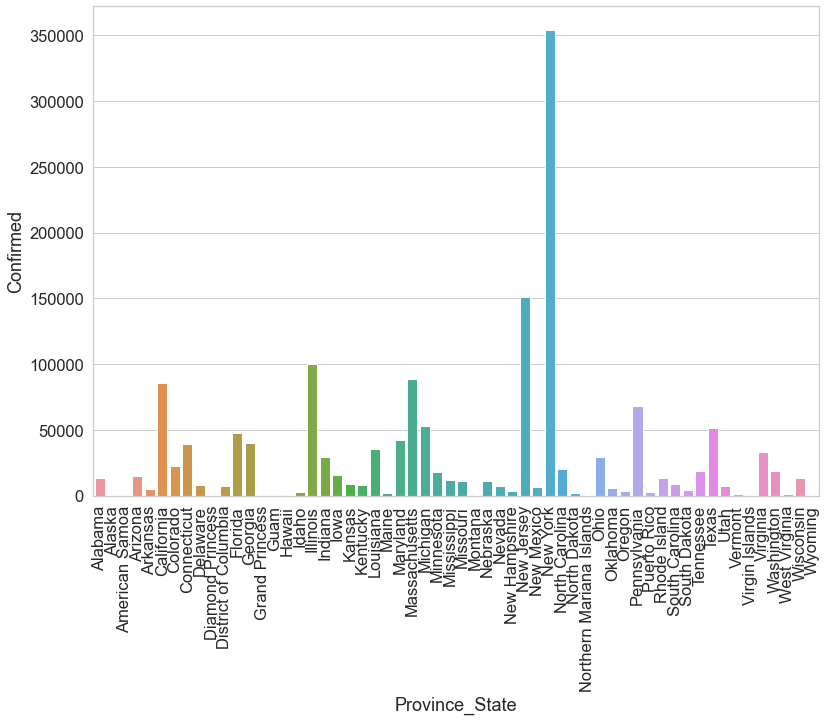

In [16]:
sns.set(rc={'figure.figsize':(13,9)}, font_scale=1.5, style='whitegrid')
sns.barplot(y="Confirmed",x="Province_State",data=ds)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'American Samoa'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'Arkansas'),
  Text(5, 0, 'California'),
  Text(6, 0, 'Colorado'),
  Text(7, 0, 'Connecticut'),
  Text(8, 0, 'Delaware'),
  Text(9, 0, 'Diamond Princess'),
  Text(10, 0, 'District of Columbia'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Grand Princess'),
  Text(14, 0, 'Guam'),
  Text(15, 0, 'Hawaii'),
  Text(16, 0, 'Idaho'),
  Text(17, 0, 'Illinois'),
  Text(18, 0, 'Indiana'),
  Text(19, 0, 'Iowa'),
  Text(20, 0, 'Kansas'),
  Text(21, 0, 'Kentucky'),
  Text(22, 0, 'Louisiana'),
  Text(23, 0, 'Maine'),
  Text(24, 0, 'Maryland'),
  Text(25, 0, 'Massachusetts'),
  Text(26, 0, 'Michigan'

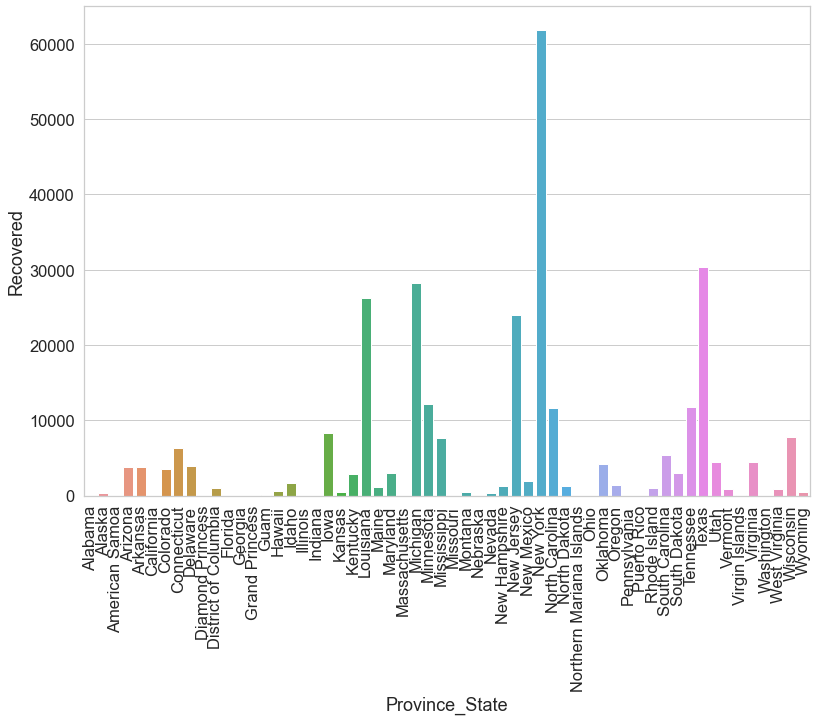

In [17]:
sns.set(rc={'figure.figsize':(13,9)}, font_scale=1.5, style='whitegrid')
sns.barplot(y="Recovered",x="Province_State",data=ds)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'American Samoa'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'Arkansas'),
  Text(5, 0, 'California'),
  Text(6, 0, 'Colorado'),
  Text(7, 0, 'Connecticut'),
  Text(8, 0, 'Delaware'),
  Text(9, 0, 'Diamond Princess'),
  Text(10, 0, 'District of Columbia'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Grand Princess'),
  Text(14, 0, 'Guam'),
  Text(15, 0, 'Hawaii'),
  Text(16, 0, 'Idaho'),
  Text(17, 0, 'Illinois'),
  Text(18, 0, 'Indiana'),
  Text(19, 0, 'Iowa'),
  Text(20, 0, 'Kansas'),
  Text(21, 0, 'Kentucky'),
  Text(22, 0, 'Louisiana'),
  Text(23, 0, 'Maine'),
  Text(24, 0, 'Maryland'),
  Text(25, 0, 'Massachusetts'),
  Text(26, 0, 'Michigan'

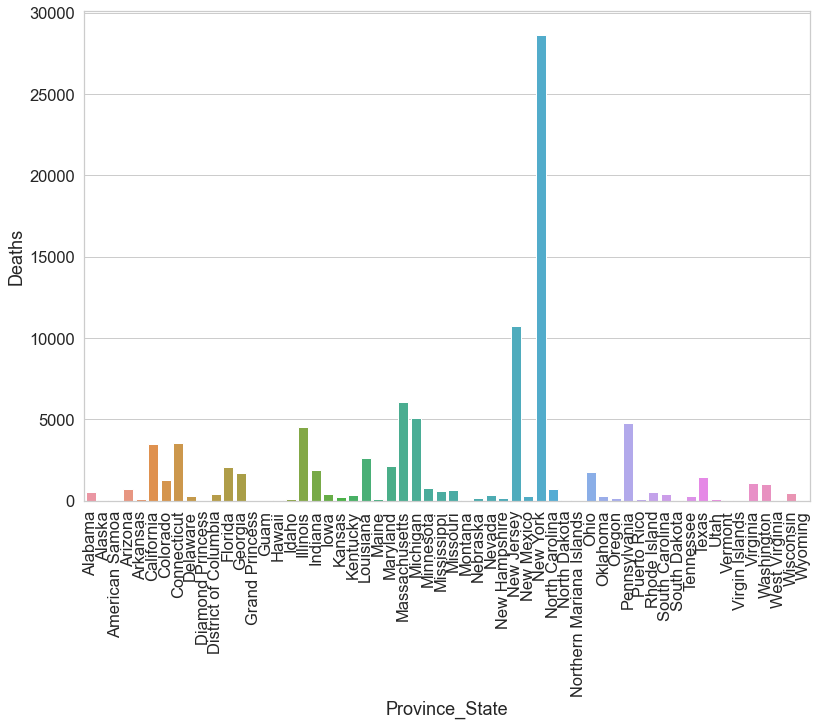

In [18]:
sns.set(rc={'figure.figsize':(13,9)}, font_scale=1.5, style='whitegrid')
sns.barplot(y="Deaths",x="Province_State",data=ds)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'American Samoa'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'Arkansas'),
  Text(5, 0, 'California'),
  Text(6, 0, 'Colorado'),
  Text(7, 0, 'Connecticut'),
  Text(8, 0, 'Delaware'),
  Text(9, 0, 'Diamond Princess'),
  Text(10, 0, 'District of Columbia'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Grand Princess'),
  Text(14, 0, 'Guam'),
  Text(15, 0, 'Hawaii'),
  Text(16, 0, 'Idaho'),
  Text(17, 0, 'Illinois'),
  Text(18, 0, 'Indiana'),
  Text(19, 0, 'Iowa'),
  Text(20, 0, 'Kansas'),
  Text(21, 0, 'Kentucky'),
  Text(22, 0, 'Louisiana'),
  Text(23, 0, 'Maine'),
  Text(24, 0, 'Maryland'),
  Text(25, 0, 'Massachusetts'),
  Text(26, 0, 'Michigan'

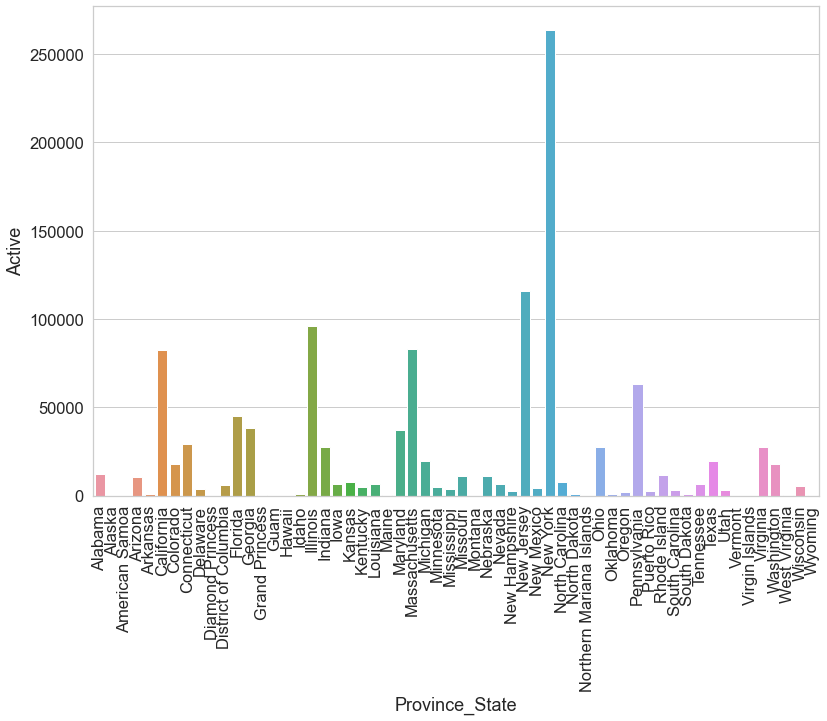

In [19]:
sns.set(rc={'figure.figsize':(13,9)}, font_scale=1.5, style='whitegrid')
sns.barplot(y="Active",x="Province_State",data=ds)
plt.xticks(rotation=90)

<AxesSubplot:>

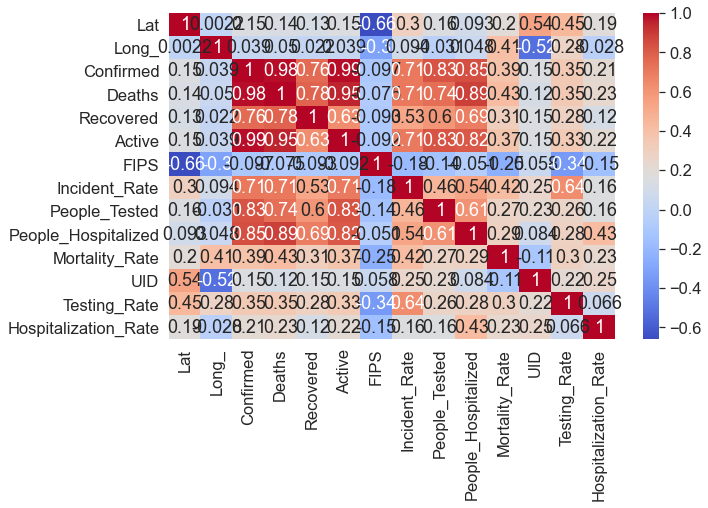

In [20]:
corrmat = ds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [21]:
for i in ds:
      print("column_name = ",i)
      print(ds[i].value_counts())
      print("\n")

column_name =  Province_State
Indiana                     1
Vermont                     1
Grand Princess              1
Texas                       1
Nevada                      1
Alaska                      1
Montana                     1
Washington                  1
Diamond Princess            1
Connecticut                 1
Tennessee                   1
Wisconsin                   1
New Mexico                  1
Ohio                        1
Hawaii                      1
Rhode Island                1
Mississippi                 1
Colorado                    1
New Jersey                  1
Virgin Islands              1
Alabama                     1
Nebraska                    1
West Virginia               1
New York                    1
North Dakota                1
Iowa                        1
South Carolina              1
American Samoa              1
Maryland                    1
Michigan                    1
North Carolina              1
Arizona                     1
Oklahoma  

<AxesSubplot:>

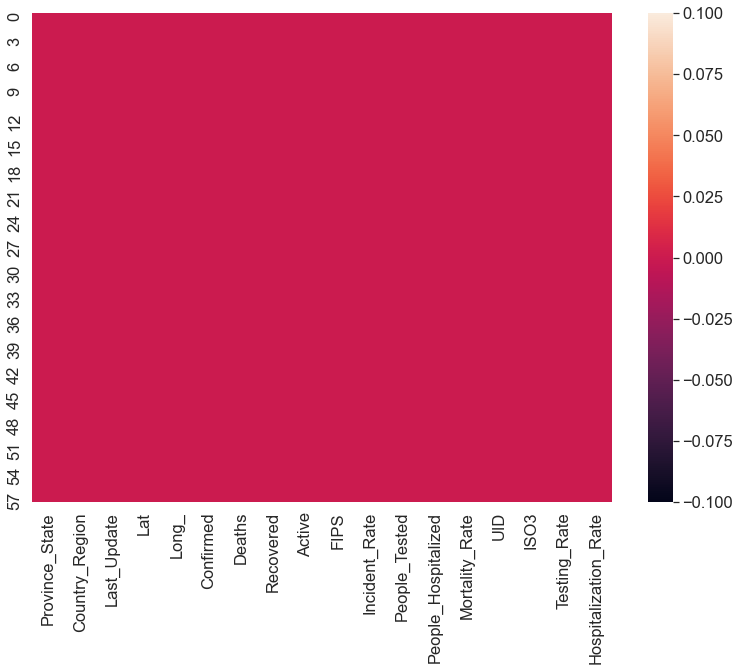

In [22]:
sns.heatmap(ds.isnull())

array([[<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Long_'}>,
        <AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Recovered'}>,
        <AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'FIPS'}>,
        <AxesSubplot:title={'center':'Incident_Rate'}>],
       [<AxesSubplot:title={'center':'People_Tested'}>,
        <AxesSubplot:title={'center':'People_Hospitalized'}>,
        <AxesSubplot:title={'center':'Mortality_Rate'}>,
        <AxesSubplot:title={'center':'UID'}>],
       [<AxesSubplot:title={'center':'Testing_Rate'}>,
        <AxesSubplot:title={'center':'Hospitalization_Rate'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

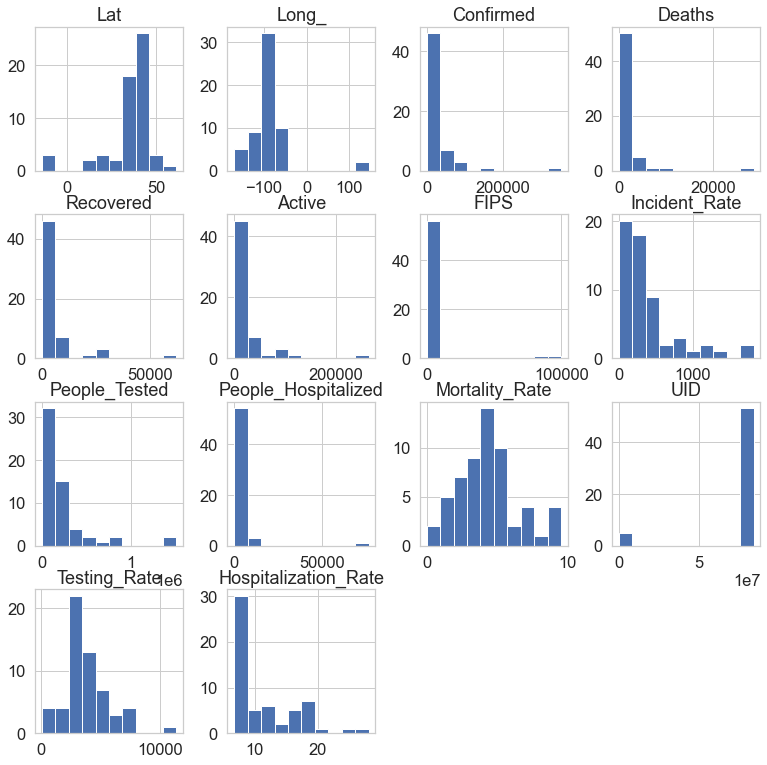

In [23]:
ds.hist(figsize=(13,13))